#Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

In [ ]:
os.chdir("/gdrive/MyDrive/Heart Disease Predict")

In [ ]:
data = pd.read_csv("framingham.csv")

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#Data Visualising

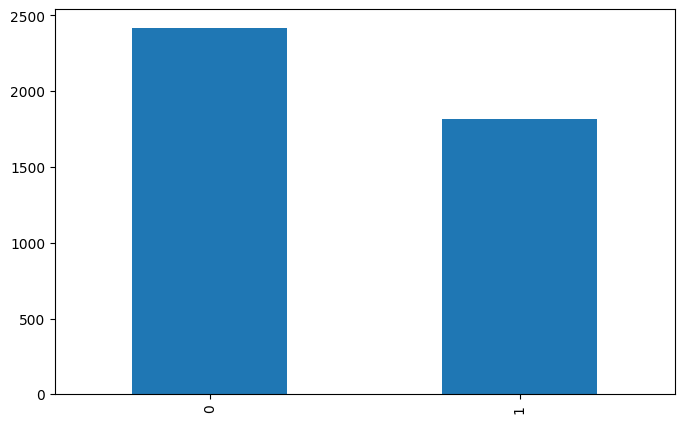

In [ ]:
plt.figure(figsize=(8,5))
ax = data["male"].value_counts().plot(kind="bar")
plt.show()

<ipython-input-173-cfddb66848b1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


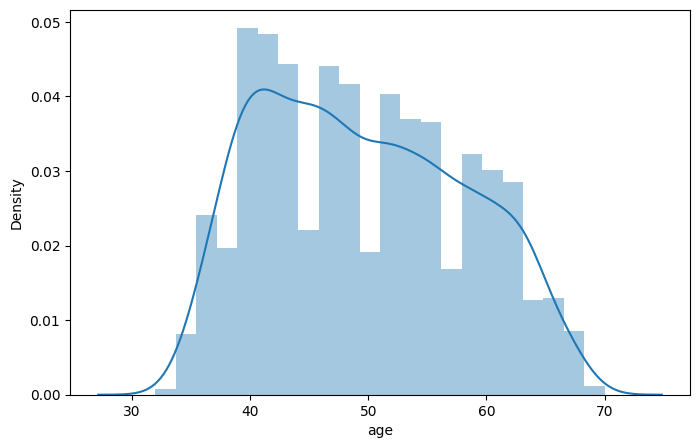

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(data["age"])
plt.show()

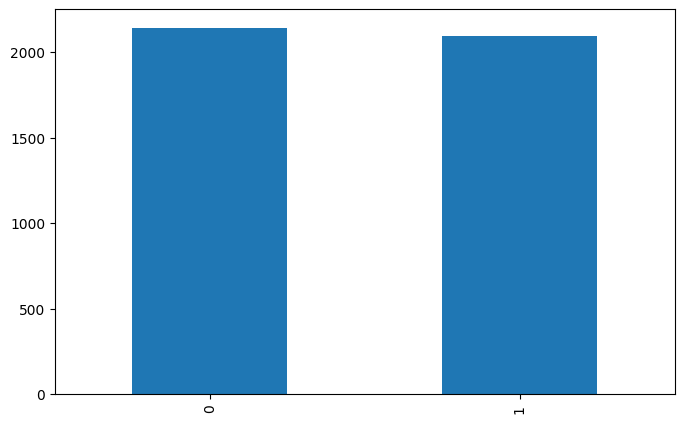

In [ ]:
plt.figure(figsize=(8,5))
ax = data["currentSmoker"].value_counts().plot(kind="bar")
plt.show()

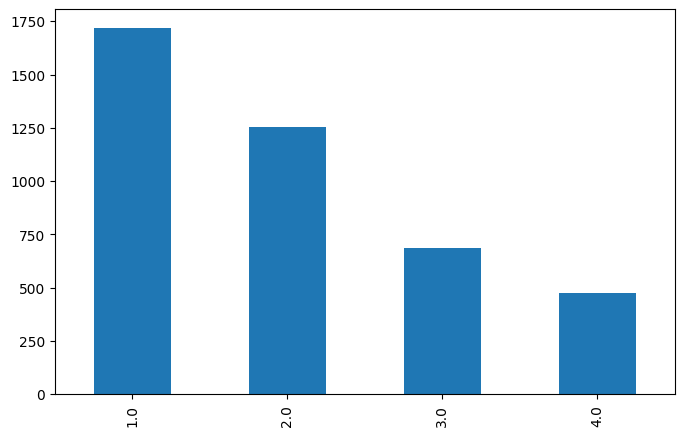

In [ ]:
plt.figure(figsize=(8,5))
ax = data["education"].value_counts().plot(kind="bar")
plt.show()

<ipython-input-176-a5a5ea761ca9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["BMI"])


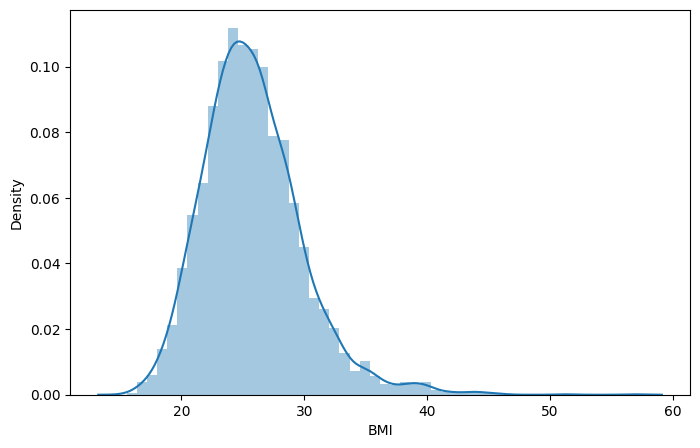

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(data["BMI"])
plt.show()

#Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data = data.drop("education", axis=1)
data = data.drop("glucose", axis=1)

In [ ]:
data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
TenYearCHD          0
dtype: int64

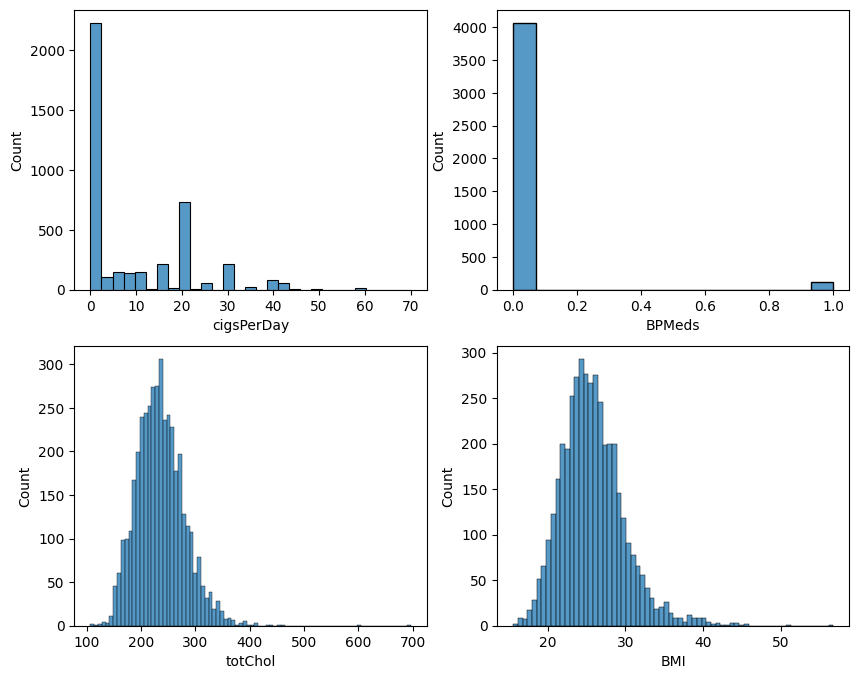

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data["cigsPerDay"])
plt.subplot(2,2,2)
sns.histplot(data["BPMeds"])
plt.subplot(2,2,3)
sns.histplot(data["totChol"])
plt.subplot(2,2,4)
sns.histplot(data["BMI"])
plt.show()

In [ ]:
data["cigsPerDay"] = data["cigsPerDay"].fillna(data["cigsPerDay"].mean())
data["BPMeds"] = data["BPMeds"].fillna(data["BPMeds"].mean())
data["totChol"] = data["totChol"].fillna(data["totChol"].mean())
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())
data["heartRate"] = data["heartRate"].fillna(data["heartRate"].mean())

In [ ]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [ ]:
data.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
male,1.000000,-0.028979,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.088428
age,-0.028979,1.000000,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,0.019456
cigsPerDay,0.316807,-0.192366,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,0.057775
BPMeds,-0.052204,0.121980,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.086774
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088505,0.252047,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.216429


In [ ]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,1.000000


#Data Split

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [ ]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.33, random_state = 0)
x_cv, x_test, y_cv, y_test = train_test_split(x_,y_, test_size = 0.5, random_state = 0)

#Data Scaling

In [ ]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)

x_cv_scaled = sc.transform(x_cv)

#Model

In [ ]:
log_r = LogisticRegression()
log_r.fit(x_train_scaled, y_train)

In [ ]:
y_hat = log_r.predict(x_train_scaled)

In [ ]:
print(confusion_matrix(y_train, y_hat))

[[2389   16]
 [ 397   37]]


In [ ]:
print(accuracy_score(y_train, y_hat))

0.8545262416343783


In [ ]:
print(mean_squared_error(y_train,y_hat)/2)

0.07273687918281085


In [ ]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2405
           1       0.70      0.09      0.15       434

    accuracy                           0.85      2839
   macro avg       0.78      0.54      0.54      2839
weighted avg       0.83      0.85      0.80      2839



In [ ]:
y_hat_cv = log_r.predict(x_cv_scaled)

In [ ]:
print(confusion_matrix(y_cv, y_hat_cv))

[[589   7]
 [100   3]]


In [ ]:
print(accuracy_score(y_cv, y_hat_cv))

0.8469241773962805


In [ ]:
print(mean_squared_error(y_cv,y_hat_cv)/2)

0.0765379113018598


#Improving Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
x_train_scaled_mapped = poly_reg.fit_transform(x_train_scaled)

x_cv_scaled_mapped = poly_reg.transform(x_cv_scaled)

In [ ]:
lr_poly = LogisticRegression()
lr_poly.fit(x_train_scaled_mapped, y_train)

In [ ]:
y_hat_poly = lr_poly.predict(x_train_scaled_mapped)

In [ ]:
print(accuracy_score(y_train, y_hat_poly))

0.8865797816132441


In [ ]:
print(mean_squared_error(y_train,y_hat_poly)/2)

0.05671010919337795


In [ ]:
print(confusion_matrix(y_train, y_hat_poly))

[[2382   23]
 [ 299  135]]


In [ ]:
print(classification_report(y_train, y_hat_poly))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2405
           1       0.85      0.31      0.46       434

    accuracy                           0.89      2839
   macro avg       0.87      0.65      0.70      2839
weighted avg       0.88      0.89      0.86      2839



In [ ]:
y_hat_cv_poly = lr_poly.predict(x_cv_scaled_mapped)

In [ ]:
print(accuracy_score(y_cv, y_hat_cv_poly))

0.844062947067239


In [ ]:
print(mean_squared_error(y_cv,y_hat_cv_poly)/2)

0.07796852646638054


In [ ]:
print(confusion_matrix(y_cv, y_hat_cv_poly))

[[577  19]
 [ 90  13]]
